# ga for knapsack

experiment with:

- population size (linear growth)
- generations count
- prob. crossover
- prob. mutation
- elite string (`HallOfFame`)
- selection
    - `selRoulette`
    - universal stochastic sampling
    - linear scaling
    - rank roulette, modify `selRoulette` input different fitness
    - `selTournament`
    - `selRandom`
- fitness variant
    - with correction, decoder
    - with penalization
- crossover operator
    - `cxOnePoint`
    - `cxTwoPoint`
    - `cxUniform`
- inversion?
- truncation selection?
- stop criteria (change in average fitness, standart deviation)

In [1]:
import glob
import random
import pandas
from matplotlib import pyplot
from deap import base, creator, tools
from genetic_algorithm import ga
from genetic_algorithm.tools import read_instances, relative_error, plot_ga_progress

In [2]:
instance_sizes = [32, 35, 37, 40, 50, 75, 100, 150, 200, 500]
paths = [('data/knap_{}.dat'.format(s), 'data/knap_{}.sol'.format(s)) for s in instance_sizes]
instances = read_instances(paths)

In [3]:
instances.loc[40, 0]

m                                                          91
weights     [54, 68, 83, 55, 12, 30, 97, 96, 63, 91, 52, 5...
values      [347, 208, 2, 17, 217, 328, 481, 2, 337, 456, ...
value                                                    1920
solution    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...
Name: (40, 0), dtype: object

In [4]:
instance = instances.loc[40, 0]
print('n\t', instance.name[0])
print('weights\t', instance['weights'])
print('values\t', instance['values'])
print('m\t', instance['m'])
print('solution', instance['solution'])
print('value\t', instance['value'])

n	 40
weights	 [54, 68, 83, 55, 12, 30, 97, 96, 63, 91, 52, 55, 8, 6, 96, 46, 55, 14, 65, 94, 52, 40, 12, 89, 38, 24, 88, 89, 40, 86, 66, 61, 11, 33, 77, 46, 97, 6, 16, 84]
values	 [347, 208, 2, 17, 217, 328, 481, 2, 337, 456, 410, 293, 456, 258, 458, 301, 373, 219, 70, 261, 385, 209, 172, 310, 99, 228, 78, 241, 85, 341, 235, 289, 59, 303, 2, 422, 419, 37, 442, 169]
m	 91
solution [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
value	 1920


## individual and fitness

this will be same for all approaches

In [5]:
# fitness value is maximalized
creator.create('Fitness', base.Fitness, weights=(1,))
creator.create('Individual', list, fitness=creator.Fitness)

## correct indivuduals

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


(1920, 1879.0, 0.021354166666666667)

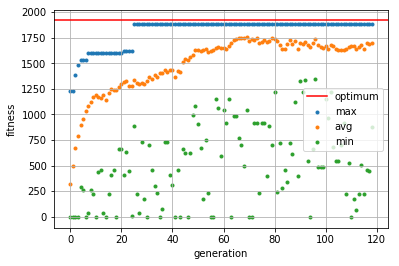

In [6]:
N_POP = 100
CXPB = 0.6
INDPB = 0.001

toolbox = base.Toolbox()
toolbox.register('attr_item', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_item, instance.name[0])
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=INDPB)
toolbox.register('select', tools.selRoulette)
toolbox.register('evaluate', ga.evaluate_correction, weights=instance['weights'],
                 values=instance['values'], m=instance['m'])

population = toolbox.population(n=N_POP)
population, logbook, halloffame = ga.genetic_algorithm(
    population, toolbox, early_stop=(1, 50), cxpb=CXPB, mutpb=1, elitism=1
)

plot_ga_progress(logbook, instance['value'])

best = halloffame[0]
print(best)
print(instance['solution'])
c_apx = best.fitness.values[0]
instance['value'], c_apx, relative_error(instance['value'], c_apx)

## penalization

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


(1920, 1875.0, 0.0234375)

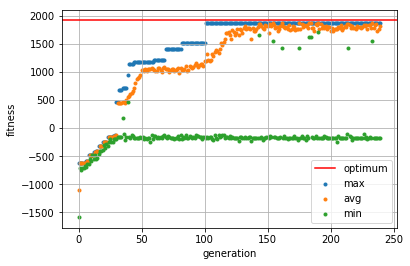

In [7]:
N_POP = 100
CXPB = 0.6
INDPB = 0.001

toolbox = base.Toolbox()
toolbox.register('attr_item', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_item, instance.name[0])
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=INDPB)
toolbox.register('select', tools.selRoulette)
toolbox.register('evaluate', ga.evaluate_penalization, weights=instance['weights'],
                 values=instance['values'], m=instance['m'])


population = toolbox.population(n=N_POP)
population, logbook, halloffame = ga.genetic_algorithm(
    population, toolbox, early_stop=(1, 50), cxpb=CXPB, mutpb=1, elitism=1
)

plot_ga_progress(logbook, instance['value'])
print(best)
print(instance['solution'])
c_apx = halloffame[0].fitness.values[0]
instance['value'], c_apx, relative_error(instance['value'], c_apx)